In [3]:
import numpy as np

from ipywidgets import Image

from ipywidgets import ColorPicker, IntSlider, link, AppLayout, HBox

from ipycanvas import MultiCanvas, hold_canvas

import matplotlib.pyplot as plt

import math

import imageio

import numpy as np
import matplotlib.cm as cm
import matplotlib.pylab as plt


In [4]:
im_size = 450

def make_c(N):
    C = np.zeros( (N, N) )
    for u in range(N):
        for v in range(N):
            if(u==0):
                C[u][v] = math.sqrt(1/float(N))
            else:
                C[u][v] = math.sqrt(2/float(N)) * math.cos( ((2*v + 1) * math.pi * u) / (2* float(N)) )
    return C

def transformar_imagem(imagem, C):
    return np.dot(np.dot(C, imagem), C.transpose())

def inverter_imagem(imagem, C):
    return np.dot(np.dot(C.transpose(), imagem), C)

# retorna os N primeiros pixeis da imagem
def reduzir_imagem(imagem_transformada, N):
    count = 0
    res = np.zeros( imagem_transformada.shape )
    for x in range(imagem_transformada.shape[1]):
        i = 0
        j = x
        while (True):
            res[i][j] = imagem_transformada[i][j]
            i += 1
            j -= 1
            count+=1
            if(count == N):
                return res
            if(j < 0 or i >= imagem_transformada.shape[0]):
                break

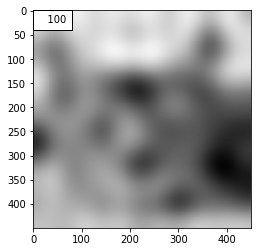

In [5]:
N_corte = 100
def plotar_imagem_com_N_pixeis(N_corte):

    im = imageio.imread('gato_cortado.jpg')


    im_transformada = transformar_imagem(im, C)
    im_ = reduzir_imagem(im_transformada,N_corte)

    im_back = inverter_imagem(im_, C)


    fig, ax = plt.subplots(1)
    ax.imshow(im_back, interpolation='nearest', cmap=cm.gray, vmin=0, vmax=255)
    ax.text(10, 25, str(N_corte).rjust(6), bbox={'facecolor': 'white', 'pad': 5})

plotar_imagem_com_N_pixeis(N_corte)    
plt.show()


In [7]:
# script para criar o gif, descomente para executá-lo
'''
lista = [1, 2, 5, 10, 20]
lista.extend( [i*30 for i in range(1, 11)] )
lista.extend( [i*100 for i in range(4, 11)] )
lista.extend( [i*200 for i in range(6, 21)] )
for i in lista:
    plotar_imagem_com_N_pixeis(i) 
    plt.savefig('imagens_gif/im' + str(i) + '.png')
    
'''


"\nlista = [1, 2, 5, 10, 20]\nlista.extend( [i*30 for i in range(1, 11)] )\nlista.extend( [i*100 for i in range(4, 11)] )\nlista.extend( [i*200 for i in range(6, 21)] )\nfor i in lista:\n    plotar_imagem_com_N_pixeis(i) \n    plt.savefig('imagens_gif/im' + str(i) + '.png')\n    \n"

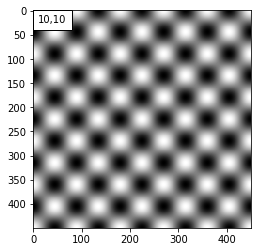

In [36]:
def atribui_valor_1_posicao(i, j, im_size):
    res = np.zeros( (im_size, im_size) )
    res[i][j] = 10000
    return res
def cria_imagem_unaria(i, j):
    C = make_c(im_size)

    im_back = inverter_imagem(atribui_valor_1_posicao(i, j, im_size), C)

    fig, ax = plt.subplots(1)
    ax.imshow(im_back, interpolation='nearest', cmap=cm.gray)
    ax.text(10, 25, str(i) + ',' + str(j), bbox={'facecolor': 'white', 'pad': 5})

cria_imagem_unaria(10, 10)
plt.show()

In [45]:
'''
for i in range(6):
    for j in range(6):
        cria_imagem_unaria(i, j) 
        plt.savefig('imagens_gif/im' + str(i) + '-' + str(j) + '.png')
        
'''


"\nfor i in range(6):\n    for j in range(6):\n        cria_imagem_unaria(i, j) \n        plt.savefig('imagens_gif/im' + str(i) + '-' + str(j) + '.png')\n        \n"

[1, 2, 3, 4, 5, 6]